**Importer les packages necessaires**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Afficher les premières lignes**

In [2]:
df = pd.read_csv('NBA_Shot_Locations_1997to2020.csv')
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


**Selectionner les 20 meilleurs joueurs et seulement les années de 2000 à 2020**

In [3]:
df['Game Date'] = df['Game Date'].astype(str)
df['Year'] = df['Game Date'].str[:4].astype(int)
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

top_20_players = ["Kobe Bryant", "LeBron James", "Stephen Curry", "Kevin Durant", "Dwyane Wade", "Dirk Nowitzki", "Tim Duncan", "Shaquille O'Neal", "Steve Nash", "Kawhi Leonard", "James Harden", "Jason Kidd", "Allen Iverson", "Chris Webber", "Kevin Garnett", "Paul Pierce", "Giannis Antetokounmpo", "Jimmy Butler", "Russell Westbrook", "Dwight Howard"]
df_top_20_players = df[df['Player Name'].isin(top_20_players)]

In [4]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,Year
303199,29900437,5,1000,Shandon Anderson,1610612745,Houston Rockets,1,11,24,Jump Shot,...,8-16 ft.,8,-81,-16,0,20000104,HOU,SEA,Regular Season,2000
303200,29900437,10,1000,Shandon Anderson,1610612745,Houston Rockets,1,10,50,Jump Shot,...,Less Than 8 ft.,7,40,61,0,20000104,HOU,SEA,Regular Season,2000
303201,29900437,52,1000,Shandon Anderson,1610612745,Houston Rockets,1,5,34,Jump Shot,...,24+ ft.,23,231,-5,1,20000104,HOU,SEA,Regular Season,2000
303202,29900437,220,1000,Shandon Anderson,1610612745,Houston Rockets,3,11,43,Jump Shot,...,24+ ft.,23,-235,-10,0,20000104,HOU,SEA,Regular Season,2000
303203,29900437,231,1000,Shandon Anderson,1610612745,Houston Rockets,3,10,32,Running Jump Shot,...,Less Than 8 ft.,4,48,10,1,20000104,HOU,SEA,Regular Season,2000


In [5]:
df_top_20_players.columns

Index(['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID',
       'Team Name', 'Period', 'Minutes Remaining', 'Seconds Remaining',
       'Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area',
       'Shot Zone Range', 'Shot Distance', 'X Location', 'Y Location',
       'Shot Made Flag', 'Game Date', 'Home Team', 'Away Team', 'Season Type',
       'Year'],
      dtype='object')

In [6]:
df_top_20_players['Player Name'].unique()

array(['Tim Duncan', 'Dirk Nowitzki', 'Paul Pierce', 'Chris Webber',
       "Shaquille O'Neal", 'Jason Kidd', 'Kevin Garnett', 'Allen Iverson',
       'Steve Nash', 'Kobe Bryant', 'LeBron James', 'Dwyane Wade',
       'Dwight Howard', 'Kevin Durant', 'Russell Westbrook',
       'James Harden', 'Stephen Curry', 'Kawhi Leonard', 'Jimmy Butler',
       'Giannis Antetokounmpo'], dtype=object)

In [7]:
df_top_20_players['Player Name'].nunique()

20

In [8]:
df_top_20_players['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [9]:
df_top_20_players['Year'].nunique()

21

In [10]:
#for col in df_top_20_players.columns:
#  print("Column: ", col)
#  print("Number of unique elements:", df_top_20_players[col].nunique())
#  print(df_top_20_players[col].unique())  
#  print("--------------------------------------------------------------------------------")

In [11]:
# General study

**Etude de corrélation entre toutes les colonnes après encoder les variables catégorielles**

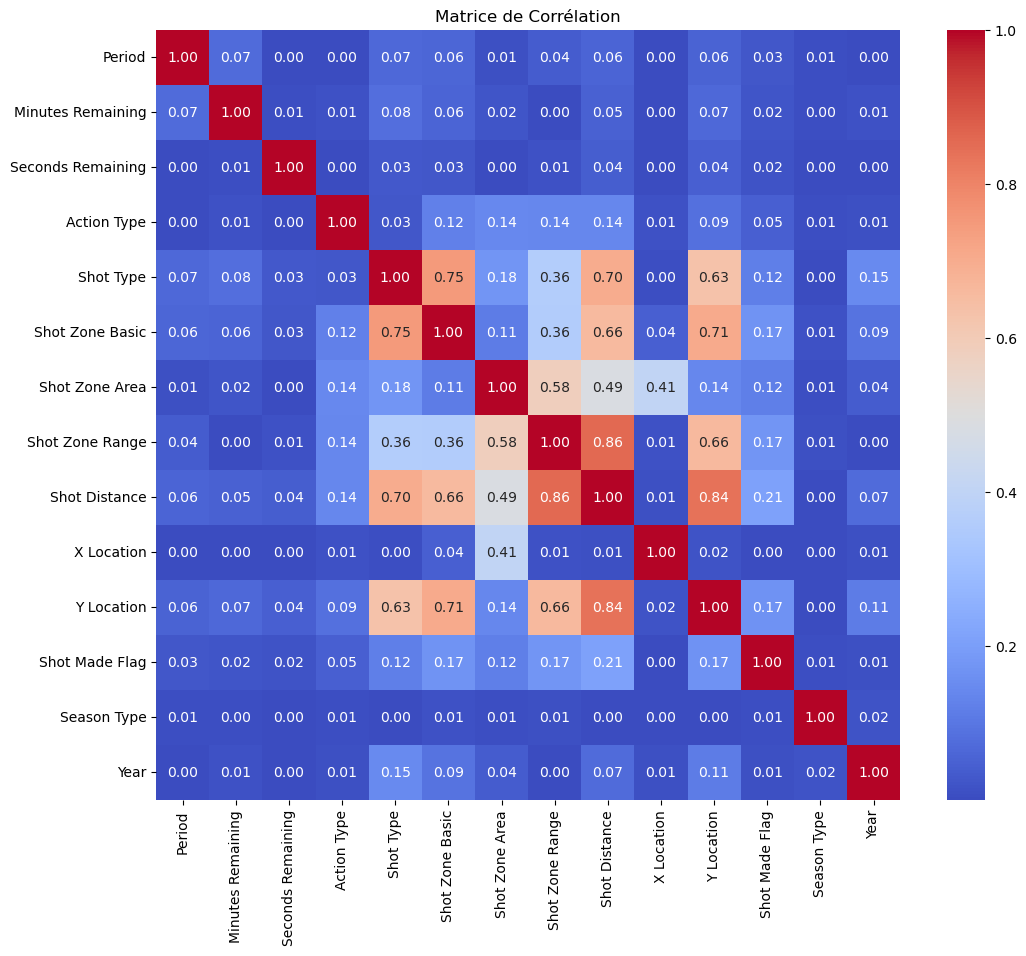

Colonnes les plus corrélées avec 'Shot Made Flag' :
Shot Made Flag       1.000000
Shot Distance        0.210635
Shot Zone Range      0.174605
Shot Zone Basic      0.170851
Y Location           0.167782
Shot Zone Area       0.120230
Shot Type            0.118106
Action Type          0.047271
Period               0.027611
Minutes Remaining    0.022236
Seconds Remaining    0.017527
Year                 0.009066
Season Type          0.006959
X Location           0.003813
Name: Shot Made Flag, dtype: float64


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df_top_20_players soit déjà chargé
# Suppression des colonnes spécifiées
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 
                   'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_reduced = df_top_20_players.drop(columns=columns_to_drop)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 
                       'Shot Zone Range', 'Season Type']

for column in categorical_columns:
    df_reduced[column] = label_encoder.fit_transform(df_reduced[column])

# Étude de la corrélation en valeur absolue
correlation_matrix = df_reduced.corr().abs()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()

# Imprimer les colonnes les plus corrélées avec la variable cible 'Shot Made Flag'
target_correlation = correlation_matrix['Shot Made Flag'].sort_values(ascending=False)
print("Colonnes les plus corrélées avec 'Shot Made Flag' :")
print(target_correlation)

In [13]:
# Avant la fusion
columns_to_drop = ['Game Date', 'Action Type', 'Shot Type']
# 'Game Date' supprimé après ajouter la colonne Year 
# 'Action Type' : catégorisée/encodée dans le tableau Play-by-play 
# 'Shot Type': catégorisation fait dans le tableau Play-by-Play
# les autres colonnes ont été gardé pour la fusion avec les autres data frame

df_filtered_toMerge = df_top_20_players.drop(columns_to_drop, axis=1)
df_filtered_toMerge.info()
df_filtered_toMerge.head()

<class 'pandas.core.frame.DataFrame'>
Index: 334331 entries, 318734 to 4727908
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Game ID            334331 non-null  int64 
 1   Game Event ID      334331 non-null  int64 
 2   Player ID          334331 non-null  int64 
 3   Player Name        334331 non-null  object
 4   Team ID            334331 non-null  int64 
 5   Team Name          334331 non-null  object
 6   Period             334331 non-null  int64 
 7   Minutes Remaining  334331 non-null  int64 
 8   Seconds Remaining  334331 non-null  int64 
 9   Shot Zone Basic    334331 non-null  object
 10  Shot Zone Area     334331 non-null  object
 11  Shot Zone Range    334331 non-null  object
 12  Shot Distance      334331 non-null  int64 
 13  X Location         334331 non-null  int64 
 14  Y Location         334331 non-null  int64 
 15  Shot Made Flag     334331 non-null  int64 
 16  Home Team          

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Shot Zone Basic,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Home Team,Away Team,Season Type,Year
318734,29900436,2,1495,Tim Duncan,1610612759,San Antonio Spurs,1,11,41,Mid-Range,Left Side(L),8-16 ft.,13,-113,68,0,MIN,SAS,Regular Season,2000
318735,29900436,29,1495,Tim Duncan,1610612759,San Antonio Spurs,1,7,53,Mid-Range,Right Side(R),8-16 ft.,13,123,51,1,MIN,SAS,Regular Season,2000
318736,29900436,56,1495,Tim Duncan,1610612759,San Antonio Spurs,1,4,33,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,MIN,SAS,Regular Season,2000
318737,29900436,96,1495,Tim Duncan,1610612759,San Antonio Spurs,1,1,17,Mid-Range,Right Side Center(RC),16-24 ft.,16,102,130,0,MIN,SAS,Regular Season,2000
318738,29900436,101,1495,Tim Duncan,1610612759,San Antonio Spurs,1,0,33,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,59,51,1,MIN,SAS,Regular Season,2000


In [14]:
df_filtered_toMerge.to_csv('Shot_Locations_top_20_players_2000to2020.csv', index=False)

**Distribution des variables les plus corrélées avec 'Shot Made Flag'**

In [15]:
# Liste des colonnes à tracer
columns_to_plot = ['Shot Distance', 'Shot Zone Range', 'Shot Zone Basic', 'Y Location', 
                   'Shot Zone Area', 'Shot Type', 'X Location', 'Period', 
                   'Minutes Remaining', 'Seconds Remaining', 'Year', 'Season Type']

len(columns_to_plot)

12

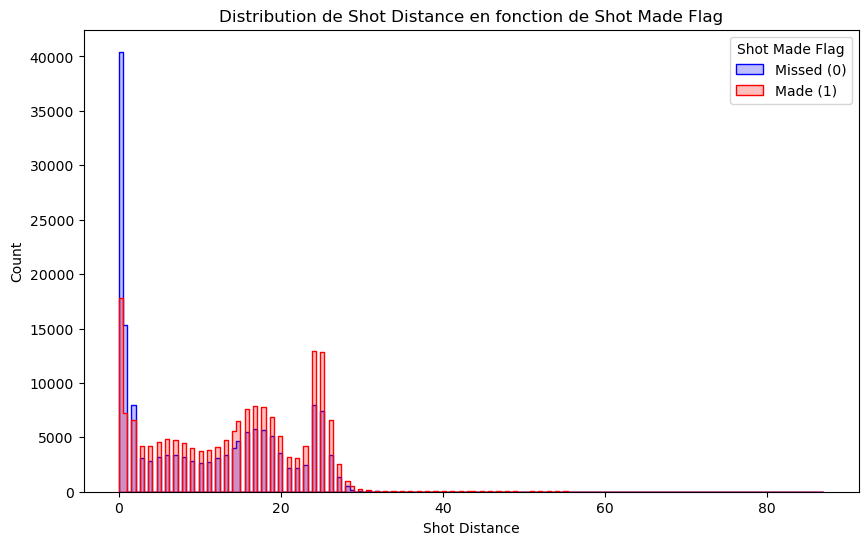

In [16]:
column = columns_to_plot[0]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players, x=column, hue='Shot Made Flag', kde=False, element="step", palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.show()

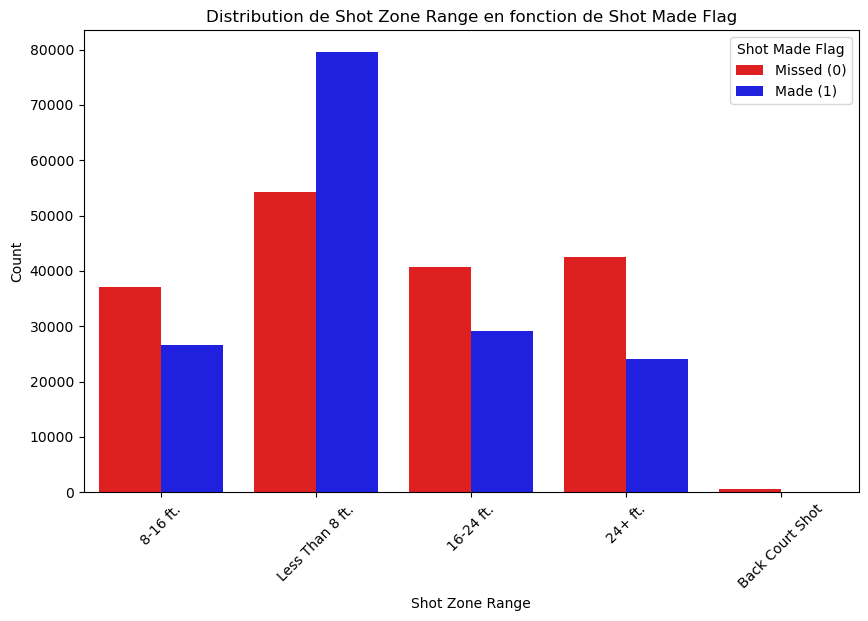

In [17]:
column = columns_to_plot[1]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

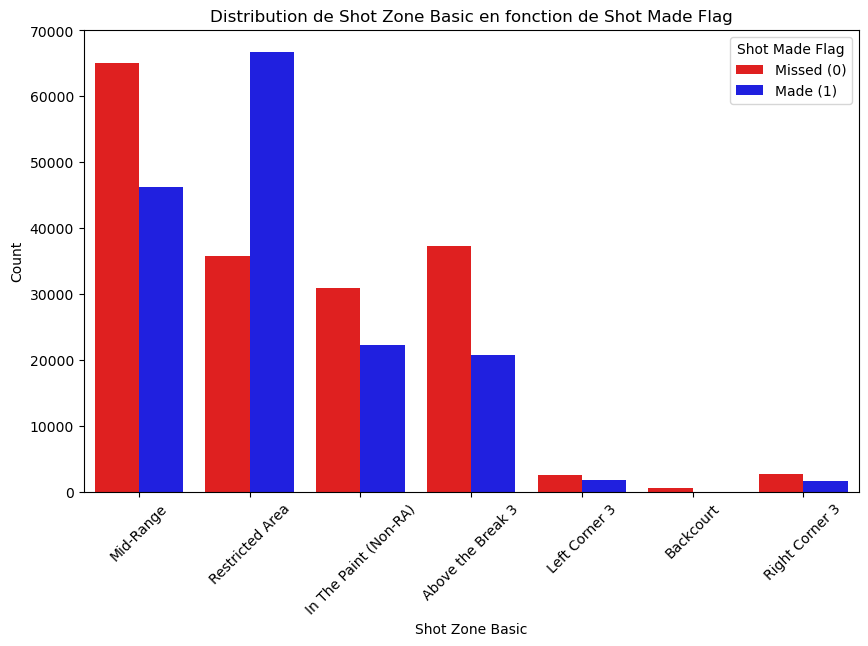

In [18]:
column = columns_to_plot[2]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

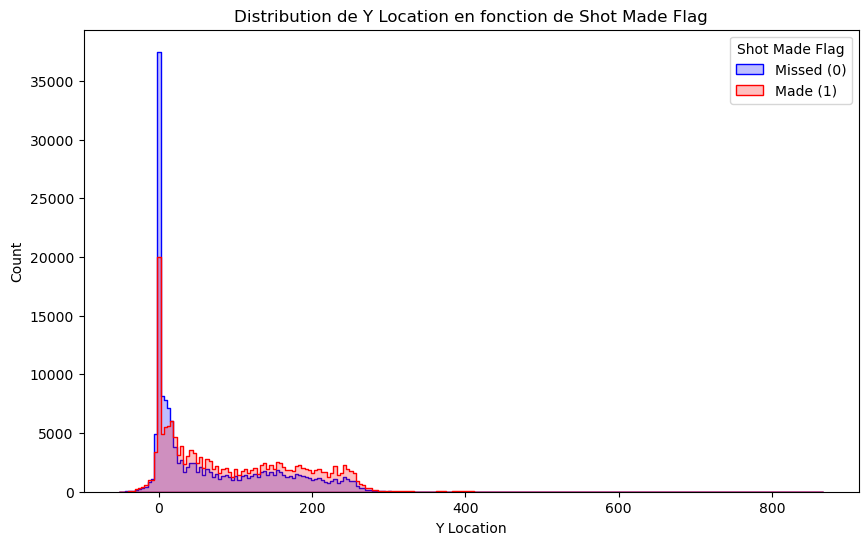

In [19]:
column = columns_to_plot[3]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players, x=column, hue='Shot Made Flag', kde=False, element="step", palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.show()

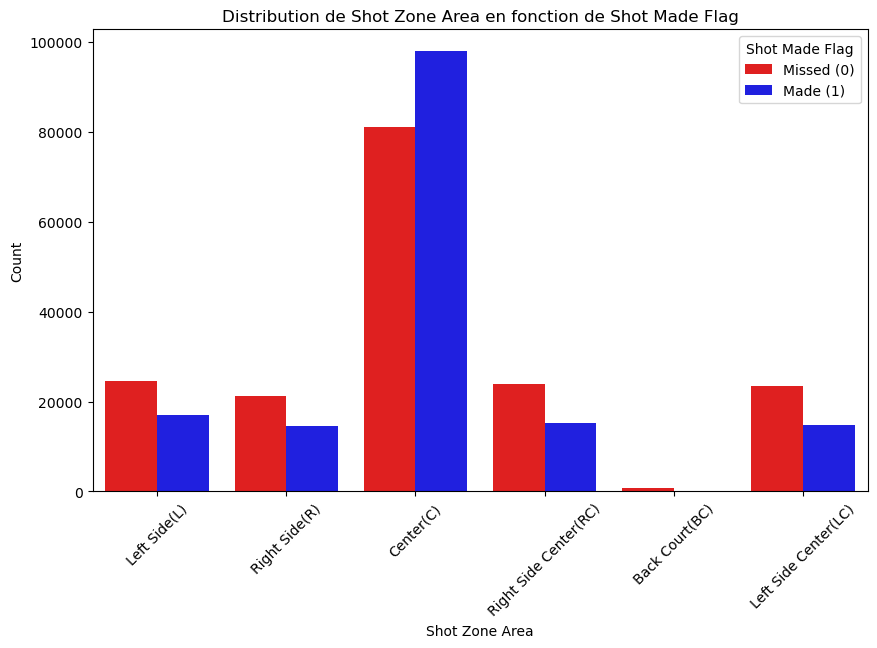

In [20]:
column = columns_to_plot[4]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

In [21]:
#column = columns_to_plot[5]
#plt.figure(figsize=(10, 6))
#sns.histplot(data=df_reduced, x=column, hue='Shot Made Flag', kde=True, element="step")
#plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
#plt.xlabel(column)
#plt.ylabel('Count')
#plt.legend(title='Shot Made Flag', labels=['Missed', 'Made'])
#plt.show()

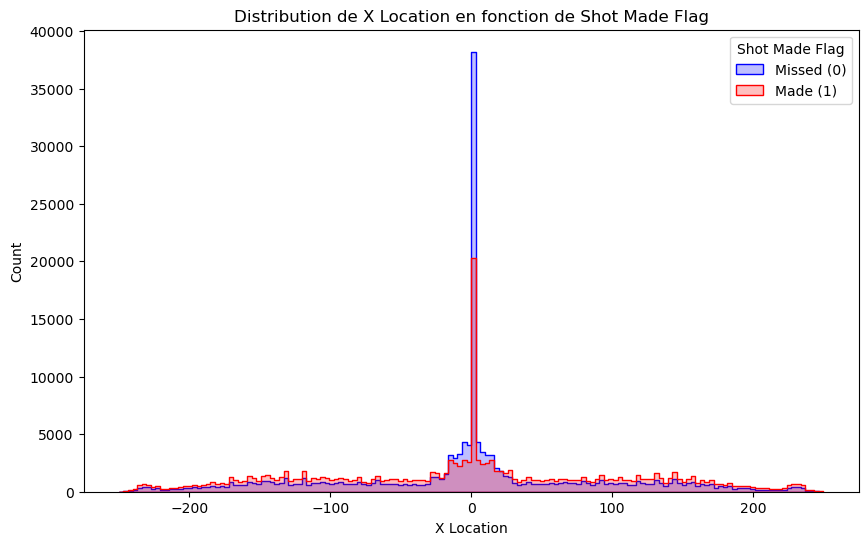

In [22]:
column = columns_to_plot[6]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_20_players, x=column, hue='Shot Made Flag', kde=False, element="step", palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.show()

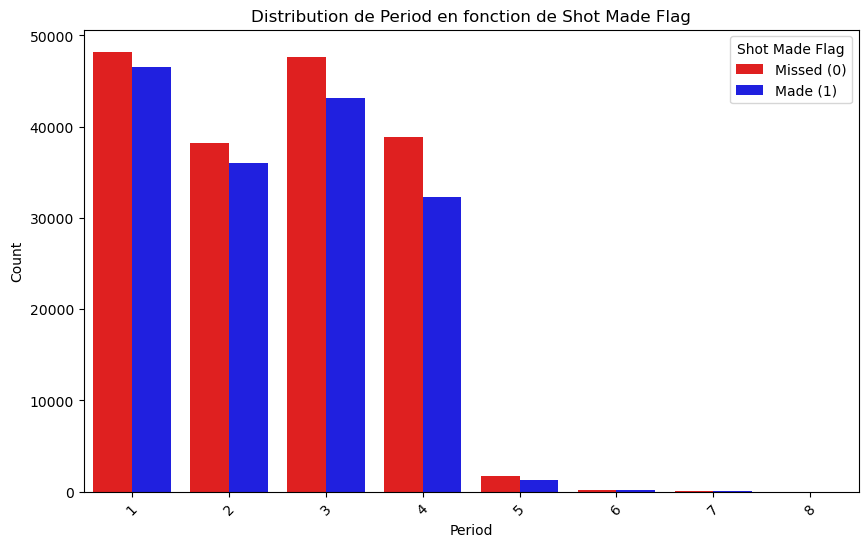

In [23]:
column = columns_to_plot[7]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

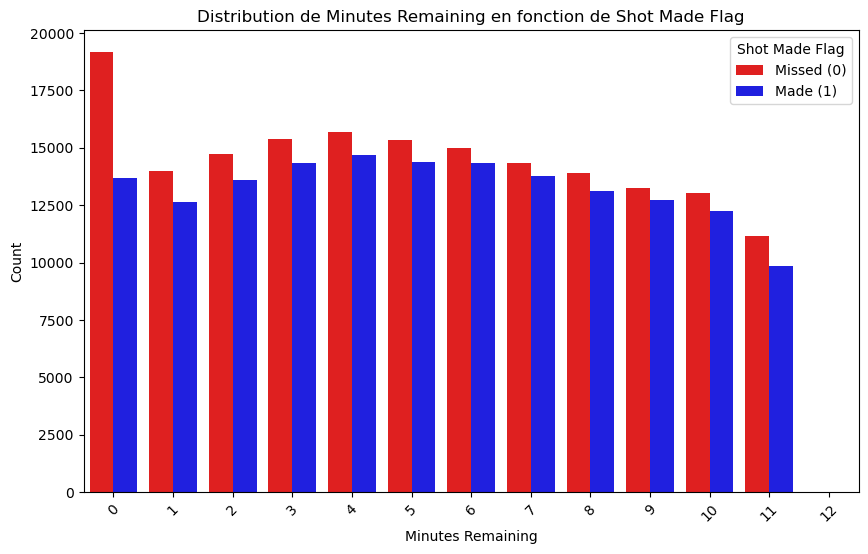

In [24]:
column = columns_to_plot[8]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

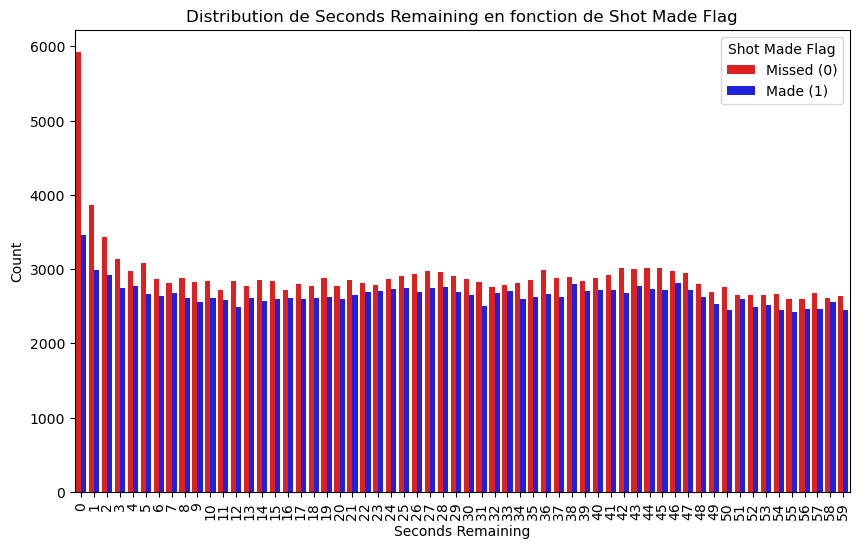

In [25]:
column = columns_to_plot[9]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=90)  
plt.show()

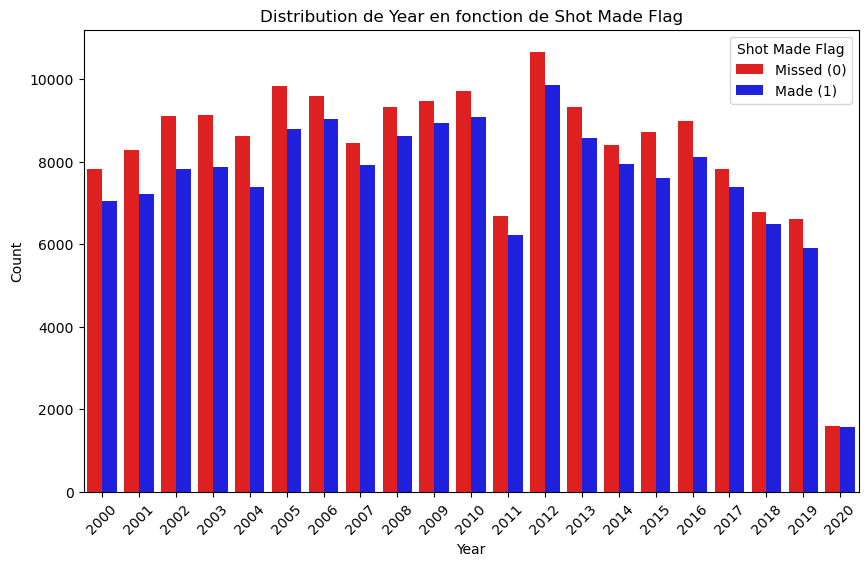

In [26]:
column = columns_to_plot[10]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

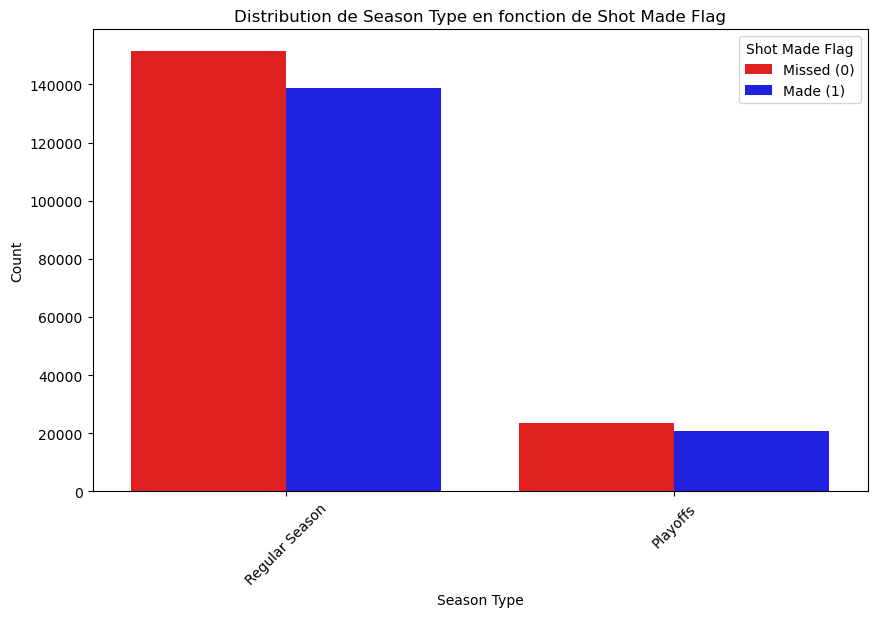

In [27]:
column = columns_to_plot[11]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_20_players, x=column, hue='Shot Made Flag', palette={0: 'red', 1: 'blue'})
plt.title(f'Distribution de {column} en fonction de Shot Made Flag')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed (0)', 'Made (1)'])
plt.xticks(rotation=45)  
plt.show()

**----------------------------------------------------------- Extra Extra Extra Extra Extra Extra -----------------------------------------------------------**

**Etude de correlation détaillée**

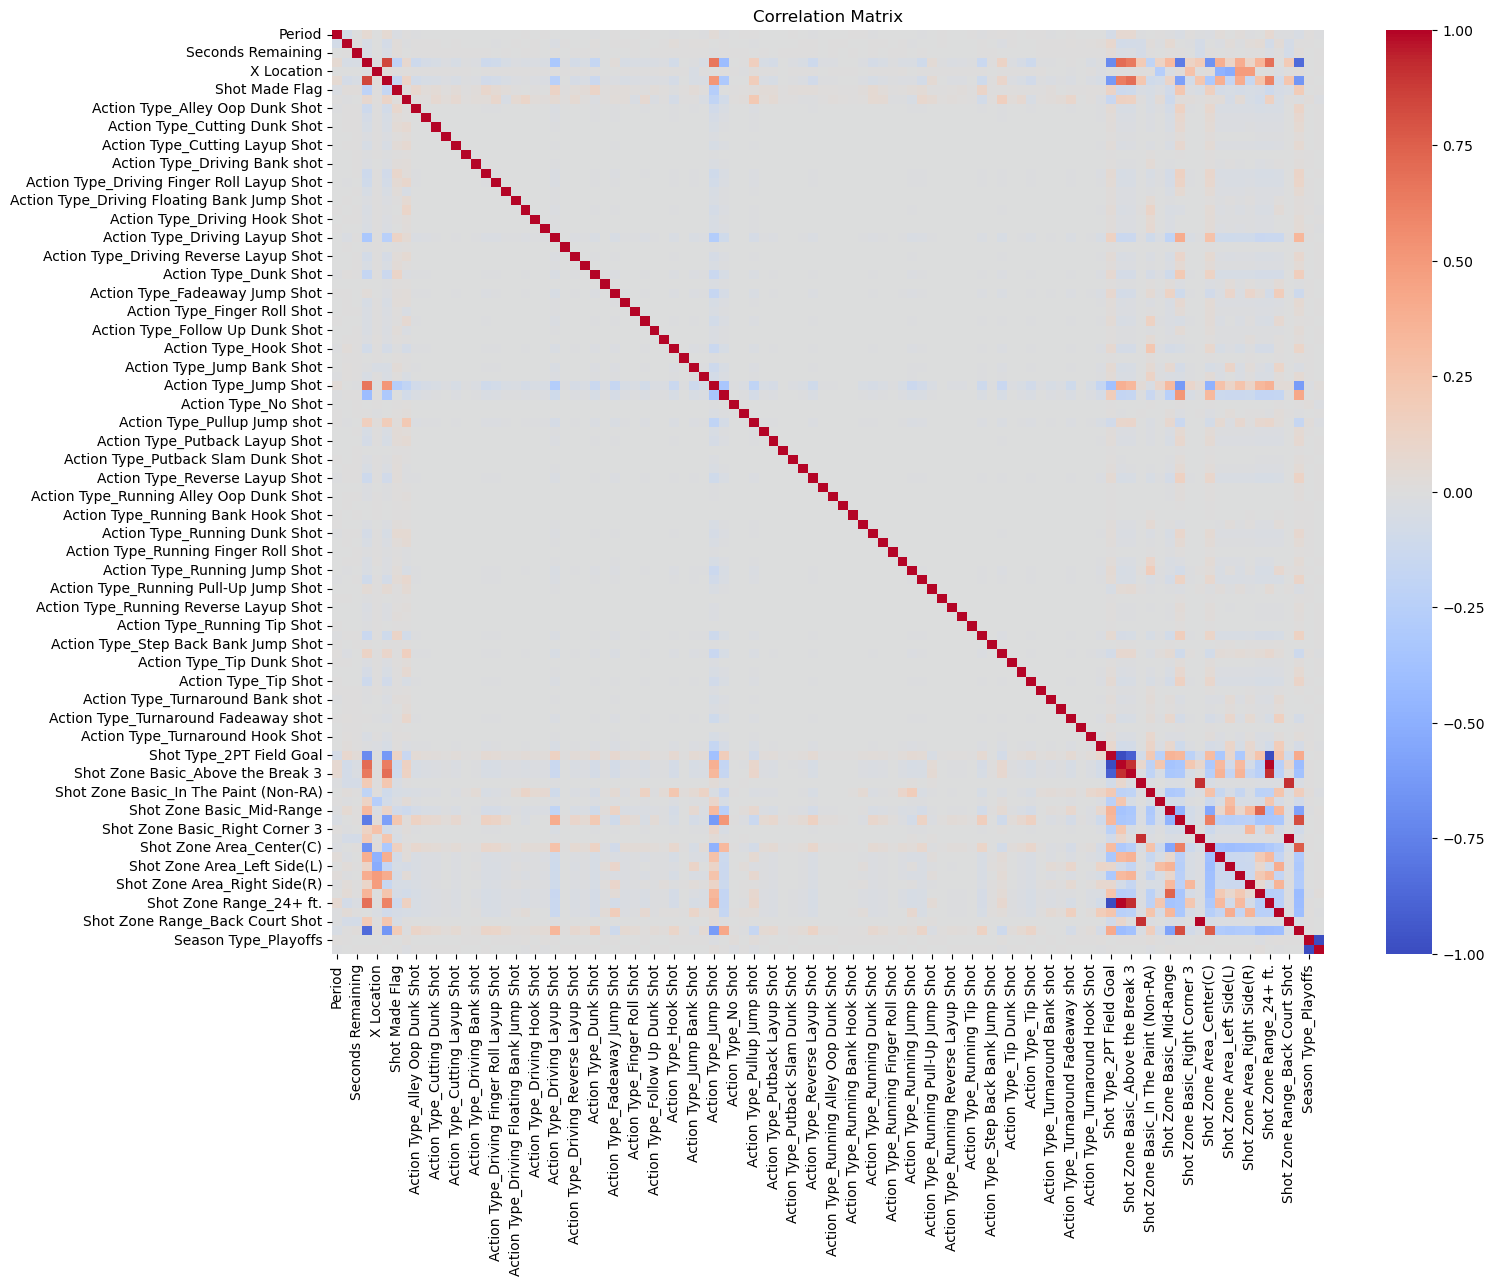

(Shot Zone Basic_Restricted Area    0.231688
 Shot Zone Range_Less Than 8 ft.    0.192520
 Shot Zone Area_Center(C)           0.150223
 Action Type_Driving Layup Shot     0.120407
 Shot Type_2PT Field Goal           0.118106
                                      ...   
 Shot Zone Range_24+ ft.           -0.113966
 Shot Type_3PT Field Goal          -0.118106
 Y Location                        -0.167782
 Shot Distance                     -0.210635
 Action Type_Jump Shot             -0.260647
 Name: Shot Made Flag, Length: 99, dtype: float64,
 ['Shot Zone Basic_Restricted Area',
  'Shot Zone Range_Less Than 8 ft.',
  'Shot Zone Area_Center(C)',
  'Action Type_Driving Layup Shot',
  'Shot Type_2PT Field Goal'])

In [28]:
# 1) Drop the specified columns
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_top_20_players_tmp = df_top_20_players.drop(columns=columns_to_drop)

# 2) Encode categorical variables
categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type']
df_top_20_players_encoded = pd.get_dummies(df_top_20_players_tmp, columns=categorical_columns)

# 3) Calculate the correlation matrix
correlation_matrix = df_top_20_players_encoded.corr()

# 4) Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5) Print the columns most correlated with the target variable 'Shot Made Flag'
correlation_with_target = correlation_matrix['Shot Made Flag'].drop('Shot Made Flag').sort_values(ascending=False)
most_correlated_columns = correlation_with_target.index[:5].tolist()

correlation_with_target, most_correlated_columns

In [29]:
correlation_with_target.shape

(99,)

**Etude de correlation détaillée en valeur absolue**

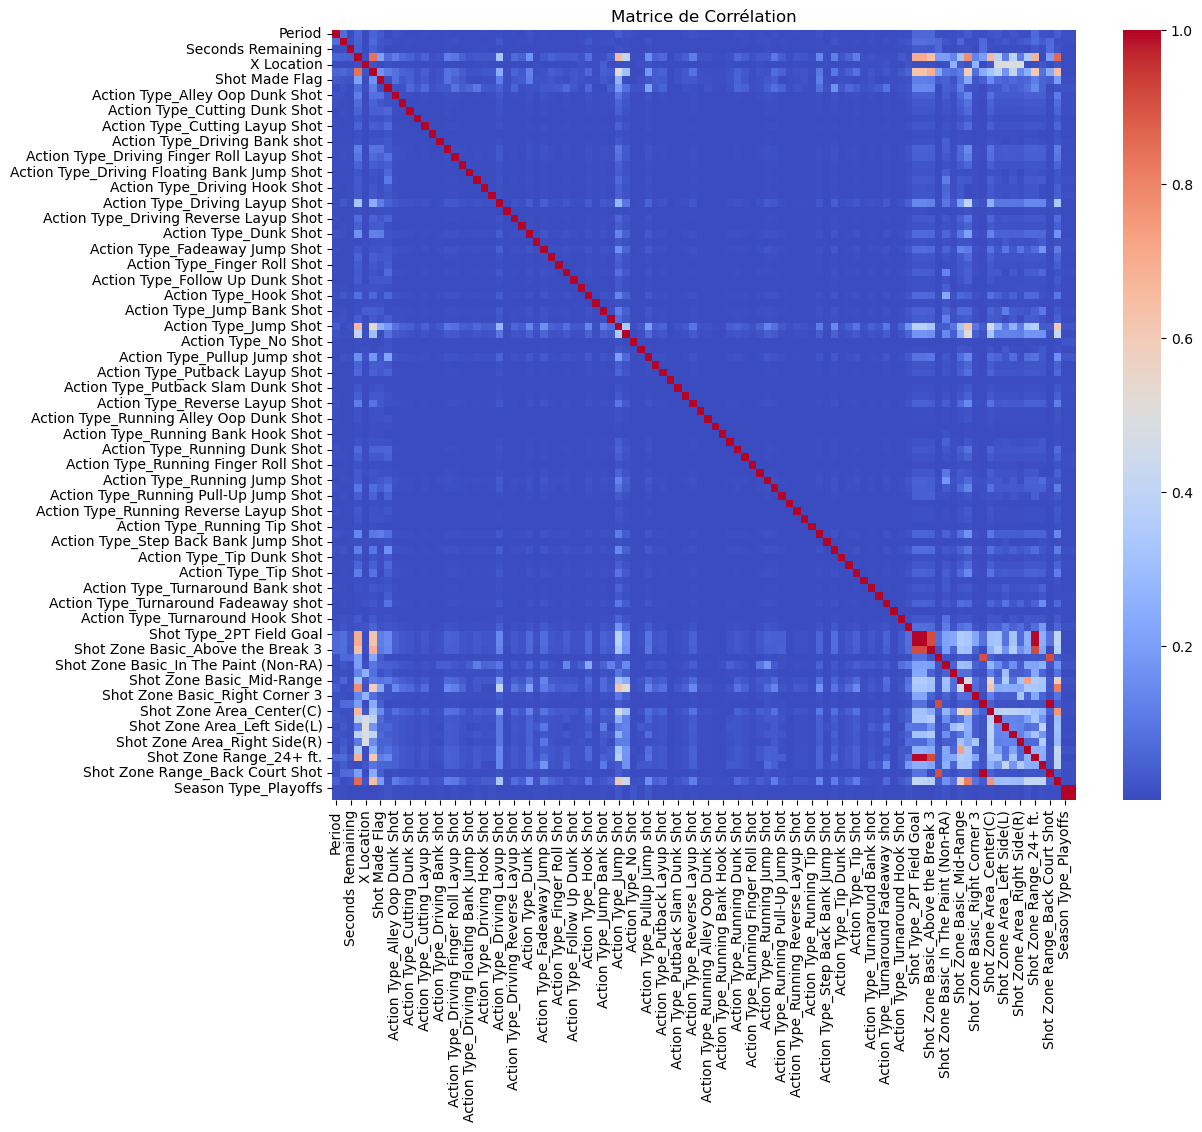

Colonnes les plus corrélées avec 'Shot Made Flag' :
Shot Made Flag                                    1.000000
Action Type_Jump Shot                             0.260647
Shot Zone Basic_Restricted Area                   0.231688
Shot Distance                                     0.210635
Shot Zone Range_Less Than 8 ft.                   0.192520
                                                    ...   
Action Type_No Shot                               0.000763
Action Type_Running Pull-Up Jump Shot             0.000409
Action Type_Step Back Jump shot                   0.000280
Action Type_Driving Floating Jump Shot            0.000188
Action Type_Turnaround Fadeaway Bank Jump Shot    0.000148
Name: Shot Made Flag, Length: 100, dtype: float64


In [30]:
# Supposons que df_top_20_players soit déjà chargé
# Suppression des colonnes spécifiées
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 
                   'Team Name', 'Game Date', 'Home Team', 'Away Team']
df_reduced = df_top_20_players.drop(columns=columns_to_drop)

# Encodage des variables catégorielles
categorical_columns = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 
                       'Shot Zone Range', 'Season Type']
df_encoded = pd.get_dummies(df_reduced, columns=categorical_columns)

# Étude de la corrélation en valeur absolue
correlation_matrix = df_encoded.corr().abs()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()

# Imprimer les colonnes les plus corrélées avec la variable cible 'Shot Made Flag'
target_correlation = correlation_matrix['Shot Made Flag'].sort_values(ascending=False)
print("Colonnes les plus corrélées avec 'Shot Made Flag' :")
print(target_correlation)

In [31]:
target_correlation.shape

(100,)

In [33]:
target_correlation.shape

(30,)

**Etude de corrélation : suppression des variables 'Action Type' et 'Shot Type'**

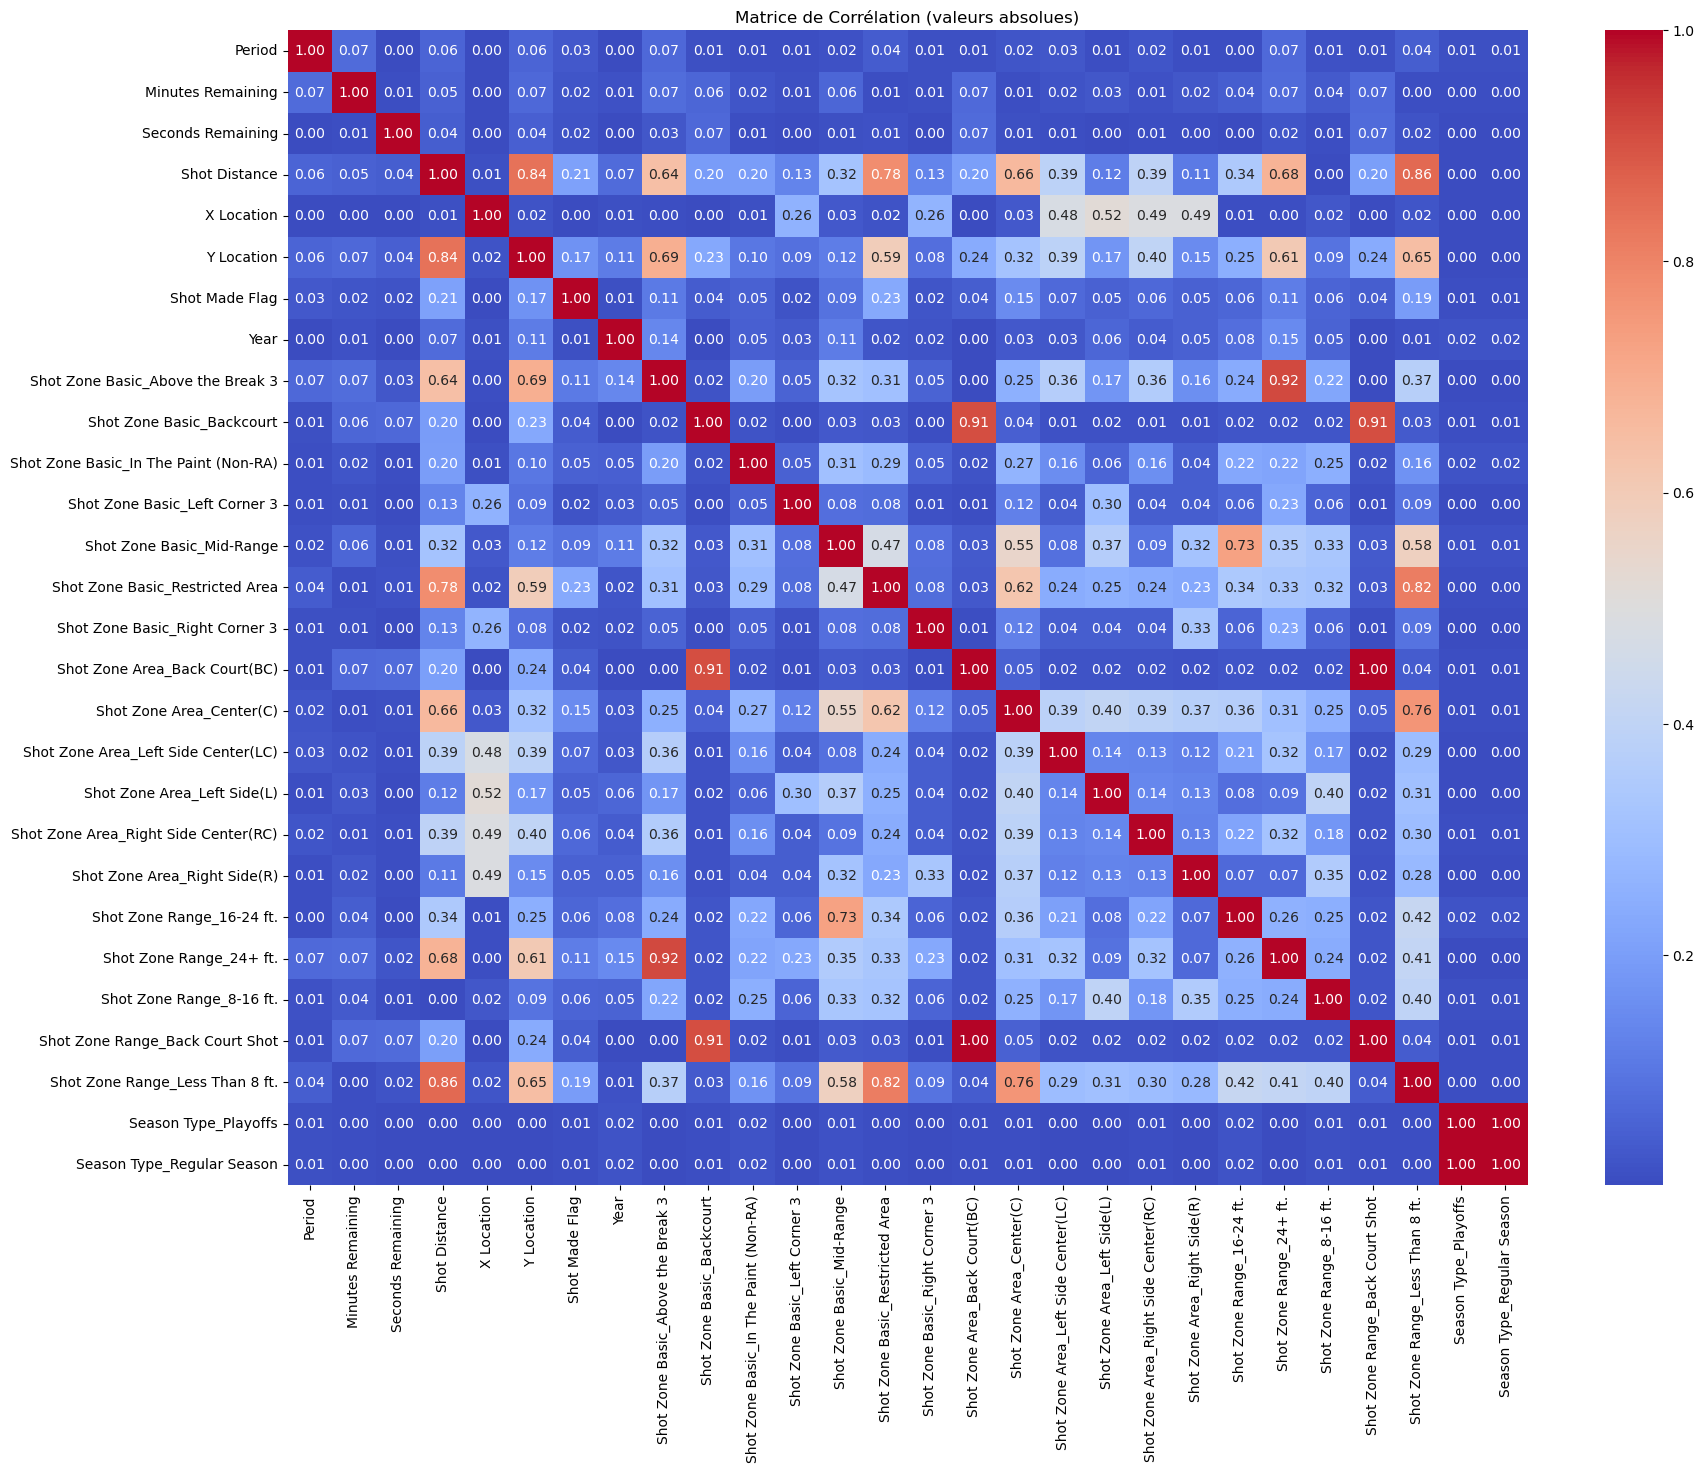

Variables les plus corrélées avec 'Shot Made Flag':
Shot Zone Basic_Restricted Area          0.231688
Shot Distance                            0.210635
Shot Zone Range_Less Than 8 ft.          0.192520
Y Location                               0.167782
Shot Zone Area_Center(C)                 0.150223
Shot Zone Range_24+ ft.                  0.113966
Shot Zone Basic_Above the Break 3        0.109256
Shot Zone Basic_Mid-Range                0.087262
Shot Zone Area_Left Side Center(LC)      0.066664
Shot Zone Area_Right Side Center(RC)     0.064130
Shot Zone Range_16-24 ft.                0.060619
Shot Zone Range_8-16 ft.                 0.057018
Shot Zone Basic_In The Paint (Non-RA)    0.050408
Shot Zone Area_Left Side(L)              0.050246
Shot Zone Area_Right Side(R)             0.047683
Shot Zone Area_Back Court(BC)            0.039803
Shot Zone Range_Back Court Shot          0.039803
Shot Zone Basic_Backcourt                0.036098
Period                                   0.02761

In [38]:
categorical_columns = ['Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type']

# Encodage one-hot des colonnes catégorielles
df_encoded = pd.get_dummies(df_filtered_toMerge, columns=categorical_columns)

# Supprimer les colonnes inutiles
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID', 'Team Name', 'Home Team', 'Away Team']
df_filtered = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Vérifier s'il reste des colonnes de type 'object'
remaining_objects = df_filtered.select_dtypes(include=['object'])
if not remaining_objects.empty:
    print("Colonnes non numériques restantes :", remaining_objects.columns.tolist())
else:
    # Calculer la matrice de corrélation en valeur absolue
    corr_matrix = df_filtered.corr().abs()

    # Visualiser la matrice de corrélation
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Matrice de Corrélation (valeurs absolues)')
    plt.show()

    # Trouver les variables les plus corrélées avec la cible
    target_corr = corr_matrix['Shot Made Flag'].drop('Shot Made Flag')
    most_correlated = target_corr.sort_values(ascending=False)

    print("Variables les plus corrélées avec 'Shot Made Flag':")
    print(most_correlated.head(27))


In [39]:
most_correlated.shape

(27,)